In [1]:
print("Hello, world!")

Hello, world!


In [2]:
a = 1
a

1

In [3]:
id(a)

94245584230144

In [4]:
b = 1
id(b)

94245584230144

In [5]:
a = 2
b

1

In [6]:
a = 1000
b = 1000
id(a) == id(b)

False

In [7]:
a is b

False

In [8]:
type(a)

int

In [9]:
a = "abc"
type(a)

str

In [10]:
import sys
sys.getrefcount(a)

51

In [11]:
l = [1, 2, 3]
l.append(l)
l

[1, 2, 3, [...]]

In [12]:
l = 1
import gc
gc.collect()

348

In [13]:
def double(x):
    return 2*x

double(2)

4

In [14]:
double

<function __main__.double(x)>

In [15]:
id(double)

140445166527248

In [16]:
f = double
f

<function __main__.double(x)>

In [17]:
f(2)

4

In [18]:
def execute(f, x):
    return f(x)

execute(double, 2)

4

In [19]:
def f():
    def g(x):
        return 2*x
    return g

f()

<function __main__.f.<locals>.g(x)>

In [20]:
double = f()
double(2)

4

In [21]:
f()(2)

4

In [22]:
map(double, [1, 2, 3])

In [23]:
list(map(double, [1, 2, 3]))

[2, 4, 6]

In [24]:
[2*x for x in [1, 2, 3]]

[2, 4, 6]

In [25]:
[2*x for x in (1, 2, 3)]

[2, 4, 6]

In [26]:
(2*x for x in [1, 2, 3])

<generator object <genexpr> at 0x7fbbf04a2890>

In [27]:
list(map(str, range(10)))

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [28]:
def odd(x):
    return x%2

odd(3)

1

In [29]:
odd(2)

0

In [30]:
list(filter(odd, [1, 2, 3, 4]))

[1, 3]

In [31]:
[x for x in [1, 2, 3, 4] if x%2]

[1, 3]

In [32]:
import functools

def add(x, y):
    return x + y

functools.reduce(add, [1, 2, 3, 4])

10

In [33]:
functools.reduce(add, ["a", "b", "c"])

'abc'

In [34]:
functools.reduce(add, map(str, range(10)))

'0123456789'

In [35]:
def mul(x, y):
    return x*y

functools.reduce(mul, range(1, 10))

362880

In [36]:
functools.reduce(lambda x, y: x + y, [1, 2, 3, 4])

10

In [37]:
f = lambda : 5
f()

5

In [38]:
"a" > 1

TypeError: '>' not supported between instances of 'str' and 'int'

In [39]:
(1, 2) < (2, 2)

True

In [40]:
(1, 2) < (1, 1)

False

In [41]:
l = [(2, 1), (1, 4), (3, 2), (1, 3), (2, 2)]
l.sort()
l

[(1, 3), (1, 4), (2, 1), (2, 2), (3, 2)]

In [42]:
l.sort(key=lambda x: x[1])
l

[(2, 1), (2, 2), (3, 2), (1, 3), (1, 4)]

In [43]:
import random
random.shuffle(l)
l

[(2, 2), (2, 1), (1, 4), (1, 3), (3, 2)]

In [44]:
l.sort(key=lambda x: x[1])
l

[(2, 1), (2, 2), (3, 2), (1, 3), (1, 4)]

In [45]:
sorted(l)

[(1, 3), (1, 4), (2, 1), (2, 2), (3, 2)]

In [46]:
t = 1, 2, [1, 2, 3]
t

(1, 2, [1, 2, 3])

In [47]:
t[0] = 2

TypeError: 'tuple' object does not support item assignment

In [48]:
t[2][0] = 5
t

(1, 2, [5, 2, 3])

In [49]:
import copy
l1 = copy.deepcopy(l)
l1

[(2, 1), (2, 2), (3, 2), (1, 3), (1, 4)]

In [50]:
l.sort(key=lambda x: x[0] + x[1])
l

[(2, 1), (2, 2), (1, 3), (3, 2), (1, 4)]

In [51]:
min(l, key=lambda x: x[0] + x[1])

(2, 1)

In [52]:
l = []
for i in range(10):
    def f(x, i=i):
        return x*i
    l.append(f)

l

[<function __main__.f(x, i=0)>,
 <function __main__.f(x, i=1)>,
 <function __main__.f(x, i=2)>,
 <function __main__.f(x, i=3)>,
 <function __main__.f(x, i=4)>,
 <function __main__.f(x, i=5)>,
 <function __main__.f(x, i=6)>,
 <function __main__.f(x, i=7)>,
 <function __main__.f(x, i=8)>,
 <function __main__.f(x, i=9)>]

In [53]:
i

9

In [54]:
l[0](5)

0

In [55]:
l[5](5)

25

In [56]:
def f(x):
    def g(y):
        return x*y
    return g

double = f(2)
double(2)

4

In [57]:
triple = f(3)
triple(4)

12

In [58]:
list(map(f(100), range(10)))

[0, 100, 200, 300, 400, 500, 600, 700, 800, 900]

In [59]:
def get_area(x):
    return x*x

def scale(f):
    def wrapper(x):
        x *= 100
        res = f(x)
        # ----
        return res
    return wrapper

get_area = scale(get_area)
get_area

<function __main__.scale.<locals>.wrapper(x)>

In [60]:
get_area(5)

250000

In [61]:
@scale
def get_area(x):
    return x*x

get_area(5)

250000

In [62]:
def log(f):
    def wrapper(*args, **kwargs):
        print(f.__name__, "<-", args, kwargs)
        res = f(*args, **kwargs)
        print(f.__name__, "->", res)
        return res
    return wrapper

@log
def add(x, y):
    return x + y

add(2, 3)

add <- (2, 3) {}
add -> 5


5

In [63]:
add(3, y=5)

add <- (3,) {'y': 5}
add -> 8


8

In [64]:
@log
@scale
def get_area(x):
    return x*x

get_area(5)

wrapper <- (5,) {}
wrapper -> 250000


250000

In [65]:
def scale(k):
    def decorator(f):
        def wrapper(x):
            return f(x*k)
        return wrapper
    return decorator

@scale(100)
def get_area(x):
    return x*x

get_area(5)

250000

In [66]:
m_to_cm = scale(100)
cm_to_inch = scale(2.54)

In [67]:
get_area

<function __main__.scale.<locals>.decorator.<locals>.wrapper(x)>

In [68]:
def f():
    """Function f"""
    return 1

help(f)

Help on function f in module __main__:

f()
    Function f



In [69]:
def scale(f):
    @functools.wraps(f)
    def wrapper(x):
        return f(x*k)
    return wrapper

@scale
def get_area(x):
    """Return area"""
    return x*x

get_area

<function __main__.get_area(x)>

In [70]:
help(get_area)

Help on function get_area in module __main__:

get_area(x)
    Return area



In [71]:
class A:
    pass

A

__main__.A

In [72]:
id(A)

94245614194912

In [73]:
B = A
B

__main__.A

In [74]:
a1 = A()
a1

In [75]:
a2 = A()
a2

In [76]:
vars(a1)

{}

In [77]:
vars(a2)

{}

In [78]:
a1.x = 23
vars(a1)

{'x': 23}

In [79]:
vars(a2)

{}

In [80]:
a1.x

23

In [81]:
class A:
    def f(self, x):
        print(self)
        self.x = x
    
a = A()
a

In [82]:
vars(a)

{}

In [83]:
a.f(123)

In [84]:
vars(a)

{'x': 123}

In [85]:
class A:
    def f(self):
        print("A")
        self.x = 5
        
class B:
    pass

a = A()
a.f

<bound method A.f of <__main__.A object at 0x7fbbf03d0c70>>

In [86]:
A.f

<function __main__.A.f(self)>

In [87]:
b = B()
A.f(b)

A


In [88]:
b.x

5

In [89]:
a.__class__

__main__.A

In [90]:
class B:
    def f(self):
        print("B")
        
a.__class__ = B
a.f()

B


In [91]:
a

In [92]:
class A:
    a = 1
    
a = A()
a.a

1

In [93]:
vars(a)

{}

In [94]:
A.a

1

In [95]:
a.a = 2
vars(a)

{'a': 2}

In [96]:
a.a

2

In [97]:
A.a

1

In [98]:
class Table:
    def get_area(self):
        return self.l*self.w

t = Table()
t.l = 100
t.w = 50
t.get_area()

5000

In [99]:
t1 = Table()
t1.get_area()

AttributeError: 'Table' object has no attribute 'l'

In [100]:
class Table:
    def __init__(self, l, w):
        self.w = w
        self.l = l
    def get_area(self):
        return self.l*self.w

In [101]:
t = Table()

TypeError: __init__() missing 2 required positional arguments: 'l' and 'w'

In [102]:
t = Table(100, 50)
vars(t)

{'w': 50, 'l': 100}

In [103]:
t.get_area()

5000

In [104]:
class A:
    def __init__(self):
        self.a = 0
        self._donttouchme = 0
        self.__secret = 0
        
a = A()
a.a

0

In [105]:
a._donttouchme

0

In [106]:
class RoundTable:
    def __init__(self, r):
        self.r = r
        self._pi = 3.1415926
    def get_area(self):
        return self._pi*self.r*self.r

In [107]:
a.__secret

AttributeError: 'A' object has no attribute '__secret'

In [108]:
vars(a)

{'a': 0, '_donttouchme': 0, '_A__secret': 0}

In [109]:
class TableWithDrawer(Table):
    pass

t = TableWithDrawer()

TypeError: __init__() missing 2 required positional arguments: 'l' and 'w'

In [110]:
t = TableWithDrawer(100, 50)
t.get_area()

5000

In [111]:
dir(object)

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

In [112]:
class TableWithDrawer(Table):
    def __init__(self, l, w, drawer_area):
        self.drawer_area = drawer_area
        super().__init__(l, w)
    def get_area(self):
        return super().get_area() + self.drawer_area

t = TableWithDrawer(100, 50, 300)
t.get_area()

5300

In [113]:
tables = [Table(100, 50), TableWithDrawer(110, 60, 300), Table(90, 40)]
tables

In [114]:
[table.get_area() for table in tables]

[5000, 6900, 3600]

In [115]:
sum(table.get_area() for table in tables)

15500

In [116]:
# F, D, E, B, C, A, obj

class A: pass

class B(A): pass

class C(A): pass

class D(B): pass

class E(B): pass

class F(D, E, C): pass

F.mro()

[__main__.F,
 __main__.D,
 __main__.E,
 __main__.B,
 __main__.C,
 __main__.A,
 object]

In [117]:
class O: pass
class C(O): pass
class A(O): pass
class B(O): pass
class D(O): pass
class E(O): pass
class K1(C, A, B): pass
class K3(A, D): pass
class K2(B, D, E): pass
class Z(K1, K3, K2): pass
Z.mro()

[__main__.Z,
 __main__.K1,
 __main__.C,
 __main__.K3,
 __main__.A,
 __main__.K2,
 __main__.B,
 __main__.D,
 __main__.E,
 __main__.O,
 object]

In [118]:
class A: pass
class B(A): pass
class C(A, B): pass

TypeError: Cannot create a consistent method resolution
order (MRO) for bases A, B

In [119]:
class C(B, A): pass

In [120]:
class A:
    def __init__(self):
        print("A")
        super().__init__()

class B(A):
    def __init__(self):
        print("B")
        super().__init__()

class C(A):
    def __init__(self):
        print("C")
        super().__init__()
        
class D(B, C):
    def __init__(self):
        print("D")
        super().__init__()

D()

D
B
C
A


In [121]:
D.mro()

[__main__.D, __main__.B, __main__.C, __main__.A, object]

In [123]:
class Shape:
    def __init__(self, **kwargs):
        self.x, self.y = kwargs['x'], kwargs['y']
        super().__init__(**kwargs)

class Circle(Shape):
    def __init__(self, **kwargs):
        self.r = kwargs['r']
        super().__init__(**kwargs)

class PaintedShape(Shape):
    def __init__(self, **kwargs):
        self.color = kwargs['color']
        super().__init__(**kwargs)
        
class PaintedCircle(Circle, PaintedShape):
    def __init__(self, x, y, r, color):
        super().__init__(x=x, y=y, r=r, color=color)
        
pc = PaintedCircle(1, 2, 3, 'red')

TypeError: object.__init__() takes exactly one argument (the instance to initialize)

In [124]:
class Shape:
    def __init__(self, **kwargs):
        self.x, self.y = kwargs.pop('x'), kwargs.pop('y')
        super().__init__(**kwargs)

class Circle(Shape):
    def __init__(self, **kwargs):
        self.r = kwargs.pop('r')
        super().__init__(**kwargs)

class PaintedShape(Shape):
    def __init__(self, **kwargs):
        self.color = kwargs.pop('color')
        super().__init__(**kwargs)
        
class PaintedCircle(Circle, PaintedShape):
    def __init__(self, x, y, r, color):
        super().__init__(x=x, y=y, r=r, color=color)
        
pc = PaintedCircle(1, 2, 3, 'red')
vars(pc)

{'r': 3, 'color': 'red', 'x': 1, 'y': 2}

In [125]:
class Shape:
    def __init__(self, x, y, **kwargs):
        self.x, self.y = x, y
        super().__init__(**kwargs)

class Circle(Shape):
    def __init__(self, r, **kwargs):
        self.r = r
        super().__init__(**kwargs)

class PaintedShape(Shape):
    def __init__(self, color, **kwargs):
        self.color = color
        super().__init__(**kwargs)
        
class PaintedCircle(Circle, PaintedShape):
    def __init__(self, x, y, r, color):
        super().__init__(x=x, y=y, r=r, color=color)
        
pc = PaintedCircle(1, 2, 3, 'red')
vars(pc)

{'r': 3, 'color': 'red', 'x': 1, 'y': 2}

In [126]:
class Person:
    def __init__(self, name, age):
        self.name = name
        self.age = age

p = Person("Bill", 23)
p

In [127]:
dir(object)

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

In [128]:
class Person:
    def __init__(self, name, age):
        self.name = name
        self.age = age
    def __repr__(self):
        return f"Person('{self.name}', {self.age})"

p = Person("Bill", 23)
p

Person('Bill', 23)

In [129]:
print(p)

Person('Bill', 23)


In [130]:
str(p)

"Person('Bill', 23)"

In [131]:
class Person:
    def __init__(self, name, age):
        self.name = name
        self.age = age
    def __str__(self):
        return f"<{self.name}, {self.age}>"

p = Person("Bill", 23)
p

In [132]:
str(p)

'<Bill, 23>'

In [133]:
class Person:
    def __init__(self, name, age):
        self.name = name
        self.age = age
    def __repr__(self):
        return f"Person('{self.name}', {self.age})"
    def __str__(self):
        return f"<{self.name}, {self.age}>"

p = Person("Bill", 23)
p

Person('Bill', 23)

In [134]:
print(p)

<Bill, 23>


In [135]:
class ReprMixin:
    def __repr__(self):
        return "{}({})".format(
            self.__class__.__name__,
            ", ".join(f"{name}={value}" for name, value in vars(self).items())
        )
    
class Person(ReprMixin):
    def __init__(self, name, age):
        self.name = name
        self.age = age
    def __str__(self):
        return f"<{self.name}, {self.age}>"

p = Person("Bill", 23)
p

Person(name=Bill, age=23)

In [136]:
Person("Bill", 32) == Person("Bill", 32)

False

In [137]:
class Person(ReprMixin):
    def __init__(self, name, age):
        self.name = name
        self.age = age
    def __str__(self):
        return f"<{self.name}, {self.age}>"
    def __eq__(self, other):
        return self.name == other.name and self.age == other.age

Person("Bill", 32) == Person("Bill", 32)

True

In [138]:
class EqMixin:
    def __eq__(self, other):
        return vars(self) == vars(other)

class Person(ReprMixin, EqMixin):
    def __init__(self, name, age):
        self.name = name
        self.age = age
    def __str__(self):
        return f"<{self.name}, {self.age}>"

Person("Bill", 32) == Person("Bill", 32)

True

In [139]:
l = [Person("John", 32), Person("Bill", 23), Person("Mary", 43)]
l.sort()

TypeError: '<' not supported between instances of 'Person' and 'Person'

In [140]:
class Person(ReprMixin, EqMixin):
    def __init__(self, name, age):
        self.name = name
        self.age = age
    def __str__(self):
        return f"<{self.name}, {self.age}>"
    def __lt__(self, other):
        return self.name < other.name

l = [Person("John", 32), Person("Bill", 23), Person("Mary", 43)]
l.sort()
l

[Person(name=Bill, age=23),
 Person(name=John, age=32),
 Person(name=Mary, age=43)]

In [142]:
class Number:
    def __init__(self, value):
        self.value = value
    def __repr__(self):
        return f"Number({self.value})"

n = Number(5)
n

Number(5)

In [143]:
class Number:
    def __init__(self, value):
        self.value = value
    def __repr__(self):
        return f"Number({self.value})"
    def __eq__(self, other):
        return self.value == other.value
    
Number(3) == Number(3)

True

In [144]:
Number(3) == 3

AttributeError: 'int' object has no attribute 'value'

In [145]:
type(3) == int

True

In [147]:
isinstance(3, (int, float))

True

In [148]:
hasattr(3, "value")

False

In [149]:
class Number:
    def __init__(self, value):
        self.value = value
    def __repr__(self):
        return f"Number({self.value})"
    def __eq__(self, other):
        if hasattr(other, "value"):
            return self.value == other.value
        elif isinstance(other, int):
            return self.value == other

Number(3) == Number(3)

True

In [150]:
Number(3) == 3

True

In [151]:
Number(3) == '3'

In [152]:
class Number:
    def __init__(self, value):
        self.value = value
    def __repr__(self):
        return f"Number({self.value})"
    def __eq__(self, other):
        if hasattr(other, "value"):
            return self.value == other.value
        elif isinstance(other, int):
            return self.value == other
        else:
            return NotImplemented

Number(3) == "3"

False

In [153]:
2 == Number(2)

True

In [154]:
2 .__eq__(Number(2))

NotImplemented

In [156]:
class Number:
    def __init__(self, value):
        self.value = value
    def __repr__(self):
        return f"Number({self.value})"
    def __eq__(self, other):
        if hasattr(other, "value"):
            return self.value == other.value
        elif isinstance(other, int):
            return self.value == other
        else:
            return NotImplemented
    def __add__(self, other):
        if hasattr(other, "value"):
            return Number(self.value + other.value)
        elif isinstance(other, int):
            return Number(self.value + other)
        else:
            return NotImplemented

Number(2) + Number(3)

Number(5)

In [157]:
Number(3) + 2

Number(5)

In [158]:
2 + Number(3)

TypeError: unsupported operand type(s) for +: 'int' and 'Number'

In [2]:
class Number:
    def __init__(self, value):
        self.value = value
    def __repr__(self):
        return f"Number({self.value})"
    def __eq__(self, other):
        if hasattr(other, "value"):
            return self.value == other.value
        elif isinstance(other, int):
            return self.value == other
        else:
            return NotImplemented
    def __add__(self, other):
        if hasattr(other, "value"):
            return Number(self.value + other.value)
        elif isinstance(other, int):
            return Number(self.value + other)
        else:
            return NotImplemented
    def __radd__(self, other):
        return self.__add__(other)

2 + Number(3)

Number(5)

In [3]:
a = Number(3)
a += 2
a

Number(5)

In [4]:
class Number:
    def __init__(self, value):
        self.value = value
    def __repr__(self):
        return f"Number({self.value})"
    def __eq__(self, other):
        if hasattr(other, "value"):
            return self.value == other.value
        elif isinstance(other, int):
            return self.value == other
        else:
            return NotImplemented
    def __add__(self, other):
        if hasattr(other, "value"):
            return Number(self.value + other.value)
        elif isinstance(other, int):
            return Number(self.value + other)
        else:
            return NotImplemented
    def __radd__(self, other):
        return self.__add__(other)
    def __iadd__(self, other):
        print("Iadd")
        return self.__add__(other)

a = Number(3)
a += 2

Iadd


In [5]:
a

Number(5)

In [6]:
a, b = 1, 2
"%d + %d" % (a, b)

'1 + 2'

In [9]:
import pathlib

p = pathlib.Path()
p / "tmp" / "abc"

PosixPath('tmp/abc')

In [13]:
class MyList(list):
    def sum(self):
        s = 0
        for item in self:
            s += item
        return s

l = MyList([1, 2, 3, 4])
l

[1, 2, 3, 4]

In [14]:
dir(l)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'append',
 'clear',
 'copy',
 'count',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort',
 'sum']

In [15]:
l.sum()

10

In [16]:
class MyList:
    def __init__(self, l):
        self._l = l
    def __repr__(self):
        return repr(self._l)

l = MyList([1, 2, 3])
l

[1, 2, 3]

In [17]:
l1 = [1, 2, 3]
l = MyList(l1)
l

[1, 2, 3]

In [18]:
l1[0] = 5
l1

[5, 2, 3]

In [19]:
l

[5, 2, 3]

In [21]:
class MyList:
    def __init__(self, l):
        self._l = list(l)
    def __repr__(self):
        return repr(self._l)

In [22]:
l = MyList("abc")
l

['a', 'b', 'c']

In [24]:
class MyList:
    def __init__(self, l=[]):
        self._l = list(l)
    def __repr__(self):
        return repr(self._l)

In [25]:
l = MyList()
l

[]

In [26]:
class MyList:
    def __init__(self, l=[]):
        self._l = list(l)
    def __repr__(self):
        return repr(self._l)
    def add(self, item):
        self._l.append(item)
    def __len__(self):
        return len(self._l)

l = MyList([1, 2, 3])
len(l)

3

In [27]:
l.add(4)
len(l)

4

In [29]:
class MyList:
    def __init__(self, l=[]):
        self._l = list(l)
    def __repr__(self):
        return repr(self._l)
    def add(self, item):
        self._l.append(item)
    def __len__(self):
        return len(self._l)
    def __setitem__(self, index, value):
        self._l[index] = value
    def __getitem__(self, index):
        return self._l[index]
    
l = MyList([1, 2, 3])
l[0]

1

In [30]:
l[0] = 5
l[0]

5

In [31]:
class MyList:
    def __init__(self, l=[]):
        self._l = list(l)
    def __repr__(self):
        return repr(self._l)
    def add(self, item):
        self._l.append(item)
    def __len__(self):
        return len(self._l)
    def __setitem__(self, index, value):
        self._l[index] = value
    def __getitem__(self, index):
        print(index)
#         return self._l[index]

l = MyList()
l[0]

0


In [32]:
l["abc"]

abc


In [33]:
l[2:4]

slice(2, 4, None)


In [35]:
s = slice(2, 4)
l = [1, 2, 3, 4, 5, 6, 7]
l[s]

[3, 4]

In [37]:
l = MyList()
l[1, 2, 'abc']

(1, 2, 'abc')


In [38]:
def f():
    ...

In [39]:
class MyList:
    def __init__(self, l=[]):
        self._l = list(l)
    def __repr__(self):
        return repr(self._l)
    def add(self, item):
        self._l.append(item)
    def __len__(self):
        return len(self._l)
    def __setitem__(self, index, value):
        self._l[index] = value
    def __getitem__(self, index):
        if isinstance(index, (int, slice)):
            return self._l[index]
        elif isinstance(index, tuple):
            return [self._l[i] for i in index]
        elif index == ...:
            return self._l.copy()
        else:
            raise IndexError

l = MyList([1, 2, 3, 4, 5, 6, 7, 8])
l[5]

6

In [40]:
l[2:5]

[3, 4, 5]

In [41]:
l[2, 4, 6, 7]

[3, 5, 7, 8]

In [42]:
l[...]

[1, 2, 3, 4, 5, 6, 7, 8]

In [43]:
for i in l:
    print(i)

1
2
3
4
5
6
7
8


In [44]:
1 in l

True

In [45]:
class MyList:
    def __init__(self, l=[]):
        self._l = list(l)
    def __repr__(self):
        return repr(self._l)
    def add(self, item):
        self._l.append(item)
    def __len__(self):
        return len(self._l)
    def __setitem__(self, index, value):
        self._l[index] = value
    def __getitem__(self, index):
        if isinstance(index, (int, slice)):
            return self._l[index]
        elif isinstance(index, tuple):
            return [self._l[i] for i in index]
        elif index == ...:
            return self._l.copy()
        else:
            raise IndexError
    def __contains__(self, item):
        print("Contains")
        return item in self._l

l = MyList([1, 2, 3])
1 in l

Contains


True

In [46]:
l = [1, 2, 3]
i = iter(l)
i

In [47]:
dir(i)

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__length_hint__',
 '__lt__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

In [48]:
next(i)

1

In [49]:
next(i)

2

In [50]:
next(i)

3

In [51]:
next(i)

StopIteration: 

In [53]:
class MyList:
    def __init__(self, l=[]):
        self._l = list(l)
    def __repr__(self):
        return repr(self._l)
    def add(self, item):
        self._l.append(item)
    def __len__(self):
        return len(self._l)
    def __setitem__(self, index, value):
        self._l[index] = value
    def __getitem__(self, index):
        if isinstance(index, (int, slice)):
            return self._l[index]
        elif isinstance(index, tuple):
            return [self._l[i] for i in index]
        elif index == ...:
            return self._l.copy()
        else:
            raise IndexError
    def __contains__(self, item):
        print("Contains")
        return item in self._l
    def __iter__(self):
        print("Iter")
        self._i = 0
        return self
    def __next__(self):
        print("Next")
        self._i += 1
        if self._i == len(self._l) + 1:
            raise StopIteration
        return self._l[self._i - 1]
    
l = MyList([1, 2, 3])
for i in l:
    print(i)

Iter
Next
1
Next
2
Next
3
Next


In [54]:
for i in l:
    for j in l:
        print(i, j)

Iter
Next
Iter
Next
1 1
Next
1 2
Next
1 3
Next
Next


IndexError: list index out of range

In [55]:
class MyList:
    def __init__(self, l=[]):
        self._l = list(l)
    def __repr__(self):
        return repr(self._l)
    def add(self, item):
        self._l.append(item)
    def __len__(self):
        return len(self._l)
    def __setitem__(self, index, value):
        self._l[index] = value
    def __getitem__(self, index):
        if isinstance(index, (int, slice)):
            return self._l[index]
        elif isinstance(index, tuple):
            return [self._l[i] for i in index]
        elif index == ...:
            return self._l.copy()
        else:
            raise IndexError
    def __contains__(self, item):
        print("Contains")
        return item in self._l
    def __iter__(self):
        return MyListIterator(self._l)
    
class MyListIterator:
    def __init__(self, l):
        self._i = 0
        self._l = l
    def __iter__(self):
        return self
    def __next__(self):
        self._i += 1
        if self._i == len(self._l) + 1:
            raise StopIteration
        return self._l[self._i - 1]
    
l = MyList([1, 2, 3])
for i in l:
    for j in l:
        print(i, j)

1 1
1 2
1 3
2 1
2 2
2 3
3 1
3 2
3 3


In [56]:
def f():
    for i in range(3):
        yield i
        print("I'm here")

f()

<generator object f at 0x7fc4b628bcf0>

In [57]:
dir(f())

['__class__',
 '__del__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__name__',
 '__ne__',
 '__new__',
 '__next__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'close',
 'gi_code',
 'gi_frame',
 'gi_running',
 'gi_yieldfrom',
 'send',
 'throw']

In [58]:
g = f()
next(g)

0

In [59]:
next(g)

I'm here


1

In [60]:
next(g)

I'm here


2

In [61]:
next(g)

I'm here


StopIteration: 

In [62]:
class MyList:
    def __init__(self, l=[]):
        self._l = list(l)
    def __repr__(self):
        return repr(self._l)
    def add(self, item):
        self._l.append(item)
    def __len__(self):
        return len(self._l)
    def __setitem__(self, index, value):
        self._l[index] = value
    def __getitem__(self, index):
        if isinstance(index, (int, slice)):
            return self._l[index]
        elif isinstance(index, tuple):
            return [self._l[i] for i in index]
        elif index == ...:
            return self._l.copy()
        else:
            raise IndexError
    def __contains__(self, item):
        print("Contains")
        return item in self._l
    def __iter__(self):
        for i in self._l:
            yield i
            
l = MyList([1, 2, 3])
for i in l:
    for j in l:
        print(i, j)

1 1
1 2
1 3
2 1
2 2
2 3
3 1
3 2
3 3


In [63]:
for i in l:
    for j in l:
        print(i, j)

1 1
1 2
1 3
2 1
2 2
2 3
3 1
3 2
3 3


In [64]:
iter(l)

<generator object MyList.__iter__ at 0x7fc4b628bf20>

In [ ]:
x = 5

def f():
    yield
    ...
    global x
    x += 1
    ...

def g(x, y):
    if x < 0:
        return 0
    else:
        return next(y)

g(-5, f())

In [65]:
list(range(5))

[0, 1, 2, 3, 4]

In [66]:
def coroutine(f):
    gen = f()
    next(gen)
    return gen

@coroutine
def f():
    i = yield
    print("f:", i)
    i = yield i + 1
    print("f:", i)
    yield i + 1
    

def main():
    i = f.send(1)
    print("main:", i)
    i = f.send(i + 1)
    print("main:", i)

main()

f: 1
main: 2
f: 3
main: 4


In [69]:
class MyClass:
    def __init__(self):
        self.a = 12

a = MyClass()

a.a

12

In [70]:
import pickle
s = pickle.dumps(a)
s

b'\x80\x04\x95%\x00\x00\x00\x00\x00\x00\x00\x8c\x08__main__\x94\x8c\x07MyClass\x94\x93\x94)\x81\x94}\x94\x8c\x01a\x94K\x0csb.'

In [72]:
b = pickle.loads(s)
b.a

12

In [73]:
class MyClass:
    def __init__(self):
        self.a = 12
        self.f = lambda: 32

a = MyClass()
pickle.dumps(a)

AttributeError: Can't pickle local object 'MyClass.__init__.<locals>.<lambda>'

In [74]:
class MyClass:
    def __init__(self):
        self.a = 12
        self.f = lambda: 32
    def __getstate__(self):
        print("Get state")
        obj = self.__dict__.copy()
        del obj['f']
        return obj
    def __setstate__(self, obj):
        print("Set state")
        self.__dict__ = obj
        self.f = lambda: 32

a = MyClass()
s = pickle.dumps(a)

Get state


In [75]:
b = pickle.loads(s)

Set state


In [76]:
vars(b)

{'a': 12, 'f': <function __main__.MyClass.__setstate__.<locals>.<lambda>()>}

In [77]:
import copy

b = copy.copy(a)

Get state
Set state


In [78]:
class Multiplier:
    def __init__(self, a):
        self.a = a
    def __call__(self, x):
        return self.a*x

double = Multiplier(2)
double(2)

4

In [79]:
dir(object)

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

In [80]:
class A:
    def __setattr__(self, name, value):
        print("Setattr", name, value)
    def __getattribute__(self, name):
        print("Getattribute", name)
    def __delattr__(self, name):
        print("Delattr", name)

a = A()
a.x = 3

Setattr x 3


In [81]:
a.x

Getattribute x


In [82]:
del a.x

Delattr x


In [83]:
class A:
    def __init__(self):
        self.x = 3
    def __setattr__(self, name, value):
        if name == 'x':
            raise AttributeError('x is read-only')
        super().__setattr__(name, value)

a = A()

AttributeError: x is read-only

In [84]:
class A:
    def __init__(self):
        self.x = 3
    def __setattr__(self, name, value):
        if name == 'x' and hasattr(self, name):
            raise AttributeError('x is read-only')
        super().__setattr__(name, value)

a = A()
a.x

3

In [85]:
a.x = 4

AttributeError: x is read-only

In [86]:
del a.x
a.x = 4
a.x

4

In [87]:
class A:
    def __init__(self):
        self.x = 3
    def __setattr__(self, name, value):
        if name == 'x' and hasattr(self, name):
            raise AttributeError('x is read-only')
        super().__setattr__(name, value)
    def __delattr__(self, name):
        if name == 'x':
            raise AttributeError('x is read-only')

a = A()
a.x = 3

AttributeError: x is read-only

In [88]:
del a.x

AttributeError: x is read-only

In [89]:
a.y = 4
a.y

4

In [90]:
class A:
    def __getattribute__(self, name):
        print("Get attribute")
        return super().__getattribute__(name)
    def __getattr__(self, name):
        print("Get attr")
        return 23

a = A()
a.x = 3
a.x

Get attribute


3

In [91]:
a.y

Get attribute
Get attr


23

In [92]:
class B:
    def m1(self):
        print("B.m1")
    def m2(self):
        print("B.m2")

class A:
    def __init__(self):
        self.b = B()
    def m2(self):
        print("A.m2")
    def m3(self):
        print("A.m3")
    def __getattr__(self, name):
        return getattr(self.b, name)

a = A()
a.m2()

A.m2


In [93]:
a.m3()

A.m3


In [94]:
a.m1()

B.m1


In [95]:
class NullObject:
    def __getattr__(self, name):
        return lambda *args, **kwargs: None
    
n = NullObject()
n.f()

In [96]:
n.add(2, 3)

In [101]:
def f_a():
    print("A")
    
def f_b():
    print("B")
    
def f_c():
    print("C")

class Observer:
    def __init__(self):
        self.observers = []

    def register(self, observer):
        self.observers.append(observer)

    def unregister(self, observer):
        self.observers.remove(observer)

    def notify(self, f):
        def wrapper(*args, **kwargs):
            res = f(*args, **kwargs)
            for observer in self.observers:
                observer()
            return res
        return wrapper

o = Observer()
    
@o.notify
def change_value():
    print("Event")
    

o.register(f_a)
o.register(f_b)
change_value()

Event
A
B


In [102]:
o.unregister(f_b)
o.register(f_c)
change_value()

Event
A
C


In [5]:
class Length:
    def __get__(self, obj, objtype):
        return obj._l*100
    def __set__(self, obj, value):
        obj._l = value/100

class Line:
    length = Length()
    def __init__(self):
        self._l = 0

l = Line()
l.length = 5
l._l

0.05

In [6]:
l.length

5.0

In [7]:
class Volume:
    def __get__(self, obj, objtype):
        return obj.l*obj.w*obj.h

class Box:
    volume = Volume()
    def __init__(self, l, w, h):
        self.l = l
        self.w = w
        self.h = h

b = Box(30, 20, 10)
b.volume

6000

In [8]:
b.l = 100
b.volume

20000

In [10]:
b.volume = 5
b.volume

5

In [11]:
vars(b)

{'l': 100, 'w': 20, 'h': 10, 'volume': 5}

In [12]:
class Line:
    def __init__(self):
        self._l = 0
    @property
    def length(self):
        return self._l*100
    @length.setter
    def length(self, value):
        self._l = value/100

l = Line()
l.length = 5
l.length

5.0

In [13]:
l._l

0.05

In [14]:
class Box:
    def __init__(self, l, w, h):
        self.l = l
        self.w = w
        self.h = h
    @property
    def volume(self):
        return self.l*self.w*self.h

b = Box(30, 20, 10)
b.volume

6000

In [15]:
b.volume = 5

AttributeError: can't set attribute

In [17]:
class A:
    def __new__(cls, x):
        print("New", x)
        self = object.__new__(cls)
        print("New", self)
        return self
    def __init__(self, x):
        print("Init", x)
        print("Init", self)

a = A(123)

New 123
New <__main__.A object at 0x7fb7829974f0>
Init 123
Init <__main__.A object at 0x7fb7829974f0>


In [18]:
a

In [19]:
class A:
    def __new__(cls):
        return 123

a = A()
a

123

In [20]:
type(a)

int

In [21]:
class Singleton:
    def __new__(cls):
        if not hasattr(cls, "_instance"):
            cls._instance = object.__new__(cls)
        return cls._instance

Singleton() is Singleton()

True

In [28]:
db = ["Car", "Car", "Truck", "Dog", "Car"]

class Car:
    def start(self):
        print("RRRR!")
        
class Truck:
    def start(self):
        print("ZHHH!")

class NullVehicle:
    def start(self):
        pass

class Vehicle:
    def __new__(cls, type_):
        if type_ == "Car":
            return Car()
        elif type_ == "Truck":
            return Truck()
        else:
            return NullVehicle()

vehicles = [Vehicle(type_) for type_ in db]
vehicles

In [29]:
for vehicle in vehicles:
    vehicle.start()

RRRR!
RRRR!
ZHHH!
RRRR!


In [30]:
class A:
    pass

a = A()
a.__class__

__main__.A

In [32]:
id(A)

93850313086960

In [33]:
A.__class__

type

In [34]:
type(1)

int

In [35]:
A = type("A", (object,), {"a": 123})
A

__main__.A

In [36]:
class A(object):
    a = 123

In [37]:
dir(type)

['__abstractmethods__',
 '__base__',
 '__bases__',
 '__basicsize__',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dictoffset__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__flags__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__instancecheck__',
 '__itemsize__',
 '__le__',
 '__lt__',
 '__module__',
 '__mro__',
 '__name__',
 '__ne__',
 '__new__',
 '__prepare__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasscheck__',
 '__subclasses__',
 '__subclasshook__',
 '__text_signature__',
 '__weakrefoffset__',
 'mro']

In [38]:
class Meta(type):
    def __new__(cls, name, parents, props):
        print("Meta new")
        new_props = {name: value for name, value in props.items()
                    if not name.startswith("unused_")}
        return type.__new__(cls, name, parents, new_props)

class A(metaclass=Meta):
    a = 1
    unused_a = 2
    def unused_f(self):
        pass

Meta new


In [39]:
dir(A)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'a']

In [40]:
class B(A):
    unused_a = 2


Meta new


In [41]:
dir(B)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'a']

In [42]:
class Meta1(type):
    pass

class B(metaclass=Meta1):
    pass

class C(A, B):
    pass

TypeError: metaclass conflict: the metaclass of a derived class must be a (non-strict) subclass of the metaclasses of all its bases

In [43]:
class Meta(type):
    def __init__(self, name, parents, props):
        print("Meta init")
        if not hasattr(self, "children"):
            self.children = {}
        else:
            self.children[name] = self

class A(metaclass=Meta):
    pass

A.children

Meta init


{}

In [44]:
class B(A):
    pass

A.children

Meta init


{'B': __main__.B}

In [45]:
class Meta(type):
    def __call__(cls, *args, **kwargs):
        print("Meta call start")
        self = type.__call__(cls, *args, **kwargs)
        print("Meta call end")
        self.x = 123
        return self

class A(metaclass=Meta):
    def __new__(cls):
        print("A new")
        return object.__new__(cls)
    def __init__(self):
        print("A init")

a = A()

Meta call start
A new
A init
Meta call end


In [46]:
a.x

123

In [47]:
import abc

class A(metaclass=abc.ABCMeta):
    @abc.abstractmethod
    def f(self):
        pass
    
A()

TypeError: Can't instantiate abstract class A with abstract methods f

In [48]:
class B(A):
    def f(self):
        pass

B()

In [49]:
!pip install numpy

You should consider upgrading via the 'pip install --upgrade pip' command.


In [50]:
import numpy as np

In [51]:
a = np.array([1, 2, 3, 4])
a

array([1, 2, 3, 4])

In [52]:
type(a)

numpy.ndarray

In [53]:
a.size

4

In [54]:
a.dtype

dtype('int64')

In [55]:
a.shape

(4,)

In [58]:
np.zeros(5)

array([0., 0., 0., 0., 0.])

In [60]:
np.ones((2, 3))

array([[1., 1., 1.],
       [1., 1., 1.]])

In [61]:
a = np.empty(10)
a

array([ 0.00000000e+000,  6.93797323e-310, -4.03754480e+287,
        6.93797323e-310,  6.93797323e-310, -2.03043493e-237,
        6.93797323e-310,  6.93797323e-310, -5.29032979e-206,
        6.93797329e-310])

In [62]:
a.fill(123)
a

array([123., 123., 123., 123., 123., 123., 123., 123., 123., 123.])

In [63]:
a = np.arange(12)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [65]:
a.shape

(12,)

In [66]:
b = a.reshape(3, 4)
b

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [67]:
b.shape

(3, 4)

In [68]:
b.base

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [69]:
a[0] = 123
b

array([[123,   1,   2,   3],
       [  4,   5,   6,   7],
       [  8,   9,  10,  11]])

In [70]:
a

array([123,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11])

In [72]:
b.strides

(32, 8)

In [73]:
a.reshape(2, 3, 2)

array([[[123,   1],
        [  2,   3],
        [  4,   5]],

       [[  6,   7],
        [  8,   9],
        [ 10,  11]]])

In [74]:
import numpy.random

a = numpy.random.rand(3, 4)
a

array([[0.06410505, 0.18347548, 0.91966274, 0.02652862],
       [0.79070041, 0.03312675, 0.25968938, 0.53672096],
       [0.65098868, 0.21762632, 0.43252707, 0.05534247]])

In [75]:
b = numpy.random.rand(3, 4)
b

array([[0.82781158, 0.4473628 , 0.82311734, 0.84748305],
       [0.70015769, 0.97503373, 0.1451719 , 0.82806498],
       [0.64444474, 0.05841192, 0.92438979, 0.17108106]])

In [76]:
a + b

array([[0.89191663, 0.63083828, 1.74278007, 0.87401167],
       [1.49085811, 1.00816048, 0.40486128, 1.36478594],
       [1.29543342, 0.27603824, 1.35691686, 0.22642353]])

In [77]:
a*b

array([[0.05306691, 0.0820801 , 0.75699034, 0.02248256],
       [0.55361498, 0.0322997 , 0.0376996 , 0.44443983],
       [0.41952623, 0.01271197, 0.39982361, 0.00946805]])

In [78]:
a @ b.T

array([[0.91461991, 0.37925504, 0.90669471],
       [1.33798738, 1.06805411, 0.84337472],
       [1.03917623, 0.77660568, 0.84152986]])

In [79]:
a + 1

array([[1.06410505, 1.18347548, 1.91966274, 1.02652862],
       [1.79070041, 1.03312675, 1.25968938, 1.53672096],
       [1.65098868, 1.21762632, 1.43252707, 1.05534247]])

In [80]:
a + [1, 2, 3, 4]

array([[1.06410505, 2.18347548, 3.91966274, 4.02652862],
       [1.79070041, 2.03312675, 3.25968938, 4.53672096],
       [1.65098868, 2.21762632, 3.43252707, 4.05534247]])

In [81]:
a + [[1], [2], [3]]

array([[1.06410505, 1.18347548, 1.91966274, 1.02652862],
       [2.79070041, 2.03312675, 2.25968938, 2.53672096],
       [3.65098868, 3.21762632, 3.43252707, 3.05534247]])

In [82]:
b += a
b

array([[0.89191663, 0.63083828, 1.74278007, 0.87401167],
       [1.49085811, 1.00816048, 0.40486128, 1.36478594],
       [1.29543342, 0.27603824, 1.35691686, 0.22642353]])

In [83]:
np.sin(a)

array([[0.06406116, 0.18244781, 0.79539725, 0.02652551],
       [0.71084608, 0.03312069, 0.25678036, 0.51132077],
       [0.60597318, 0.21591254, 0.41916649, 0.05531422]])

In [84]:
a[0]

array([0.06410505, 0.18347548, 0.91966274, 0.02652862])

In [85]:
a[0][0]

0.06410505455072502

In [86]:
a[0, 0]

0.06410505455072502

In [87]:
a[0, 1:3]

array([0.18347548, 0.91966274])

In [88]:
a

array([[0.06410505, 0.18347548, 0.91966274, 0.02652862],
       [0.79070041, 0.03312675, 0.25968938, 0.53672096],
       [0.65098868, 0.21762632, 0.43252707, 0.05534247]])

In [89]:
a[0:2, 1]

array([0.18347548, 0.03312675])

In [90]:
a[0:2, 1:3]

array([[0.18347548, 0.91966274],
       [0.03312675, 0.25968938]])

In [91]:
a[0:2, ...]

array([[0.06410505, 0.18347548, 0.91966274, 0.02652862],
       [0.79070041, 0.03312675, 0.25968938, 0.53672096]])

In [92]:
a[0:2, :]

array([[0.06410505, 0.18347548, 0.91966274, 0.02652862],
       [0.79070041, 0.03312675, 0.25968938, 0.53672096]])

In [93]:
a[:, [1, 3]]

array([[0.18347548, 0.02652862],
       [0.03312675, 0.53672096],
       [0.21762632, 0.05534247]])

In [94]:
a[0:1, [1, 3]] *= 2
a

array([[0.06410505, 0.36695096, 0.91966274, 0.05305725],
       [0.79070041, 0.03312675, 0.25968938, 0.53672096],
       [0.65098868, 0.21762632, 0.43252707, 0.05534247]])

In [95]:
a > 0.5

array([[False, False,  True, False],
       [ True, False, False,  True],
       [ True, False, False, False]])

In [96]:
a[a > 0.5]

array([0.91966274, 0.79070041, 0.53672096, 0.65098868])

In [97]:
b[a > 0.5]

array([1.74278007, 1.49085811, 1.36478594, 1.29543342])

In [98]:
b

array([[0.89191663, 0.63083828, 1.74278007, 0.87401167],
       [1.49085811, 1.00816048, 0.40486128, 1.36478594],
       [1.29543342, 0.27603824, 1.35691686, 0.22642353]])

In [99]:
b[a > 0.5] = 0.5
b

array([[0.89191663, 0.63083828, 0.5       , 0.87401167],
       [0.5       , 1.00816048, 0.40486128, 0.5       ],
       [0.5       , 0.27603824, 1.35691686, 0.22642353]])

In [100]:
np.min(a)

0.03312675309027202

In [101]:
np.mean(a, axis=0)

array([0.50193138, 0.20590134, 0.53729306, 0.21504023])

In [102]:
np.mean(a, axis=1)

array([0.350944  , 0.40505938, 0.33912114])

In [103]:
a[0, 0] = np.nan
a

array([[       nan, 0.36695096, 0.91966274, 0.05305725],
       [0.79070041, 0.03312675, 0.25968938, 0.53672096],
       [0.65098868, 0.21762632, 0.43252707, 0.05534247]])

In [104]:
np.nan + 1

nan

In [105]:
np.mean(a)

nan

In [106]:
np.nanmean(a)

0.39239936262373726

In [107]:
import pandas as pd

/home/z/.virtualenvs/ds/lib/python3.8/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/home/z/.virtualenvs/ds/lib/python3.8/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [109]:
df = pd.read_csv('./Downloads/GlobalLandTemperaturesByMajorCity.csv')

In [110]:
type(df)

pandas.core.frame.DataFrame

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239177 entries, 0 to 239176
Data columns (total 7 columns):
dt                               239177 non-null object
AverageTemperature               228175 non-null float64
AverageTemperatureUncertainty    228175 non-null float64
City                             239177 non-null object
Country                          239177 non-null object
Latitude                         239177 non-null object
Longitude                        239177 non-null object
dtypes: float64(2), object(5)
memory usage: 12.8+ MB


In [113]:
df.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,228175.000000,228175.000000
mean,18.125969,0.969343
std,10.024800,0.979644
min,-26.772000,0.040000
25%,12.710000,0.340000
50%,20.428000,0.592000
75%,25.918000,1.320000
max,38.283000,14.037000


In [115]:
df.groupby("City").count()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,Latitude,Longitude
City,,,,,,
Abidjan,1977,1777,1777,1977,1977,1977
Addis Abeba,1965,1679,1679,1965,1965,1965
Ahmadabad,2613,2448,2448,2613,2613,2613
Aleppo,2669,2479,2479,2669,2669,2669
Alexandria,2669,2666,2666,2669,2669,2669
...,...,...,...,...,...,...
Tokyo,2025,2020,2020,2025,2025,2025
Toronto,3239,3141,3141,3239,3239,3239
Umm Durman,1857,1768,1768,1857,1857,1857


In [116]:
df[0:3]

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [118]:
df["dt"]

0         1849-01-01
1         1849-02-01
2         1849-03-01
3         1849-04-01
4         1849-05-01
             ...    
239172    2013-05-01
239173    2013-06-01
239174    2013-07-01
239175    2013-08-01
239176    2013-09-01
Name: dt, Length: 239177, dtype: object

In [119]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [120]:
df.tail()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
239172,2013-05-01,18.979,0.807,Xian,China,34.56N,108.97E
239173,2013-06-01,23.522,0.647,Xian,China,34.56N,108.97E
239174,2013-07-01,25.251,1.042,Xian,China,34.56N,108.97E
239175,2013-08-01,24.528,0.840,Xian,China,34.56N,108.97E
239176,2013-09-01,NaN,NaN,Xian,China,34.56N,108.97E


In [121]:
df.iloc[0, 0]

'1849-01-01'

In [122]:
df[::10000]

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
10000,1856-01-01,14.171,1.650,Alexandria,Egypt,31.35N,30.16E
20000,1820-07-01,26.763,2.345,Bangkok,Thailand,13.66N,99.91E
30000,2012-06-01,21.472,0.702,Bogotá,Colombia,4.02N,74.73W
40000,1834-10-01,NaN,NaN,Cali,Colombia,4.02N,76.34W
50000,1874-04-01,11.699,1.088,Chengdu,China,31.35N,103.66E
60000,1914-10-01,14.381,0.351,Dalian,China,39.38N,120.69E
70000,1992-02-01,24.934,0.333,Durban,South Africa,29.74S,31.38E
80000,1916-08-01,17.544,1.253,Harare,Zimbabwe,18.48S,30.42E
90000,1992-07-01,24.428,0.251,Ibadan,Nigeria,7.23N,4.05E


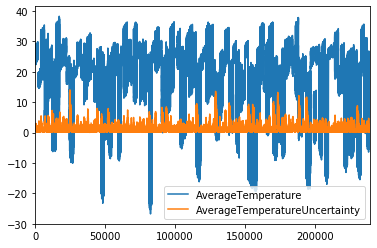

In [123]:
df.plot()

In [125]:
df[df["City"] == "Kiev"]

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
114923,1743-11-01,0.895,2.092,Kiev,Ukraine,50.63N,31.69E
114924,1743-12-01,NaN,NaN,Kiev,Ukraine,50.63N,31.69E
114925,1744-01-01,NaN,NaN,Kiev,Ukraine,50.63N,31.69E
114926,1744-02-01,NaN,NaN,Kiev,Ukraine,50.63N,31.69E
114927,1744-03-01,NaN,NaN,Kiev,Ukraine,50.63N,31.69E
...,...,...,...,...,...,...,...
118157,2013-05-01,19.000,0.300,Kiev,Ukraine,50.63N,31.69E
118158,2013-06-01,21.222,0.346,Kiev,Ukraine,50.63N,31.69E
118159,2013-07-01,20.483,0.244,Kiev,Ukraine,50.63N,31.69E
118160,2013-08-01,19.944,0.327,Kiev,Ukraine,50.63N,31.69E


In [126]:
dfk = df[df["City"] == "Kiev"]

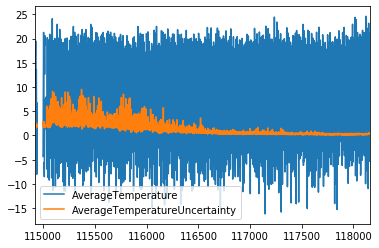

In [127]:
dfk.plot()

In [129]:
dfk.dropna()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
114923,1743-11-01,0.895,2.092,Kiev,Ukraine,50.63N,31.69E
114928,1744-04-01,9.820,2.498,Kiev,Ukraine,50.63N,31.69E
114929,1744-05-01,13.142,1.845,Kiev,Ukraine,50.63N,31.69E
114930,1744-06-01,17.393,1.703,Kiev,Ukraine,50.63N,31.69E
114931,1744-07-01,19.389,1.592,Kiev,Ukraine,50.63N,31.69E
...,...,...,...,...,...,...,...
118156,2013-04-01,9.827,0.341,Kiev,Ukraine,50.63N,31.69E
118157,2013-05-01,19.000,0.300,Kiev,Ukraine,50.63N,31.69E
118158,2013-06-01,21.222,0.346,Kiev,Ukraine,50.63N,31.69E
118159,2013-07-01,20.483,0.244,Kiev,Ukraine,50.63N,31.69E


In [130]:
dfk.interpolate()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
114923,1743-11-01,0.895,2.0920,Kiev,Ukraine,50.63N,31.69E
114924,1743-12-01,2.680,2.1732,Kiev,Ukraine,50.63N,31.69E
114925,1744-01-01,4.465,2.2544,Kiev,Ukraine,50.63N,31.69E
114926,1744-02-01,6.250,2.3356,Kiev,Ukraine,50.63N,31.69E
114927,1744-03-01,8.035,2.4168,Kiev,Ukraine,50.63N,31.69E
...,...,...,...,...,...,...,...
118157,2013-05-01,19.000,0.3000,Kiev,Ukraine,50.63N,31.69E
118158,2013-06-01,21.222,0.3460,Kiev,Ukraine,50.63N,31.69E
118159,2013-07-01,20.483,0.2440,Kiev,Ukraine,50.63N,31.69E
118160,2013-08-01,19.944,0.3270,Kiev,Ukraine,50.63N,31.69E


In [131]:
dfk.fillna(dfk['AverageTemperature'].mean())

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
114923,1743-11-01,0.895000,2.092000,Kiev,Ukraine,50.63N,31.69E
114924,1743-12-01,7.041033,7.041033,Kiev,Ukraine,50.63N,31.69E
114925,1744-01-01,7.041033,7.041033,Kiev,Ukraine,50.63N,31.69E
114926,1744-02-01,7.041033,7.041033,Kiev,Ukraine,50.63N,31.69E
114927,1744-03-01,7.041033,7.041033,Kiev,Ukraine,50.63N,31.69E
...,...,...,...,...,...,...,...
118157,2013-05-01,19.000000,0.300000,Kiev,Ukraine,50.63N,31.69E
118158,2013-06-01,21.222000,0.346000,Kiev,Ukraine,50.63N,31.69E
118159,2013-07-01,20.483000,0.244000,Kiev,Ukraine,50.63N,31.69E
118160,2013-08-01,19.944000,0.327000,Kiev,Ukraine,50.63N,31.69E


In [132]:
dfk = dfk.fillna(dfk['AverageTemperature'].mean())
dfk = dfk[['dt', 'AverageTemperature']]
dfk.head()

,dt,AverageTemperature
114923,1743-11-01,0.895000
114924,1743-12-01,7.041033
114925,1744-01-01,7.041033
114926,1744-02-01,7.041033
114927,1744-03-01,7.041033


In [133]:
dfk.iloc[0, 0][0:4]

'1743'

In [134]:
dfk['dt'].apply(lambda x: x[0:4])

114923    1743
114924    1743
114925    1744
114926    1744
114927    1744
          ... 
118157    2013
118158    2013
118159    2013
118160    2013
118161    2013
Name: dt, Length: 3239, dtype: object

In [135]:
dfk['year'] = dfk['dt'].apply(lambda x: x[0:4])
dfk.head()

,dt,AverageTemperature,year
114923,1743-11-01,0.895000,1743
114924,1743-12-01,7.041033,1743
114925,1744-01-01,7.041033,1744
114926,1744-02-01,7.041033,1744
114927,1744-03-01,7.041033,1744


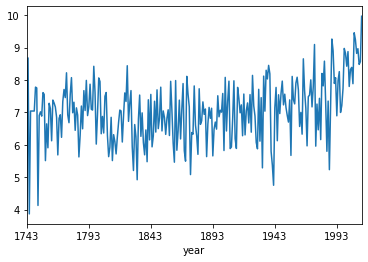

In [137]:
dfk.groupby('year')['AverageTemperature'].mean().plot()